In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c50815bd00>,
 'caps': [<matplotlib.lines.Line2D at 0x2c508807400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c50815b9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c508082700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c508082a60>],
 'means': []}

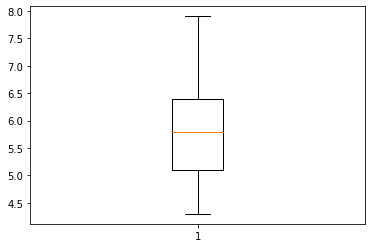

In [8]:
plt.boxplot(data['SL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c509892c70>,
 'caps': [<matplotlib.lines.Line2D at 0x2c5098a13a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c509892910>],
 'medians': [<matplotlib.lines.Line2D at 0x2c5098a1a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c5098a1dc0>],
 'means': []}

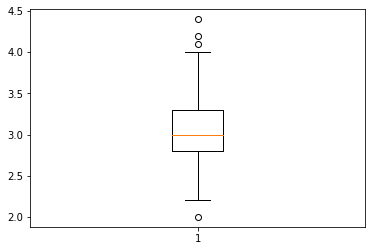

In [9]:
plt.boxplot(data['SW'])

In [10]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)


Outliers=[]
for x in data['SW']:
    if ((x>upp_limit) or (x<low_limit)):
        Outliers.append(x)
print('Outliers :\n',Outliers)

Q1 is: 2.8
Q2 is: 3.0
Q3 is: 3.3
IQR = Q3 - Q1 = 0.5
Lower limit is : 2.05
Upper limit is : 4.05
Outliers :
 [4.4, 4.1, 4.2, 2.0]


In [11]:
ind1 = data['SW']>upp_limit
data.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [12]:
ind2 = data['SW']<low_limit
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [13]:
data.drop(data.loc[ind1].index,inplace=True)
data.drop(data.loc[ind2].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c509948b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2c509955280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c509948880>],
 'medians': [<matplotlib.lines.Line2D at 0x2c509955940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c509955ca0>],
 'means': []}

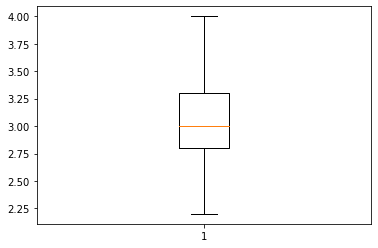

In [14]:
plt.boxplot(data['SW'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c5099b73d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c5099b7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c5099b7070>],
 'medians': [<matplotlib.lines.Line2D at 0x2c5099c2130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c5099c2490>],
 'means': []}

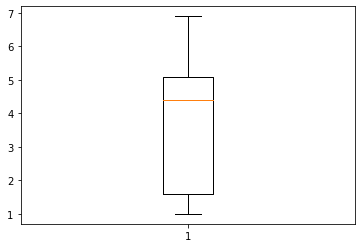

In [15]:
plt.boxplot(data['PL'])

In [16]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [17]:
x.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863
std,0.834093,0.395145,1.757117,0.760365
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [18]:
from sklearn import preprocessing
x=preprocessing.normalize(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,146.000000,146.000000,146.000000,146.000000
mean,0.751066,0.401463,0.459469,0.143106
std,0.045094,0.102443,0.157755,0.077580
min,0.653877,0.238392,0.167836,0.016695
25%,0.714998,0.326738,0.255615,0.051003
50%,0.750496,0.354176,0.536496,0.166125
75%,0.788919,0.520565,0.582177,0.197981
max,0.860939,0.607125,0.636981,0.280419


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [20]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[12  0  0]
 [ 0  5  3]
 [ 0  0 10]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.62      0.77         8
 Iris-virginica       0.77      1.00      0.87        10

       accuracy                           0.90        30
      macro avg       0.92      0.88      0.88        30
   weighted avg       0.92      0.90      0.89        30



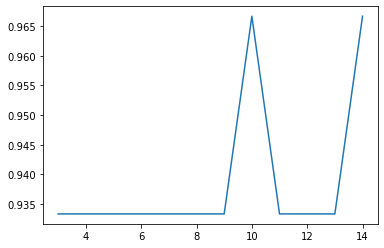

In [22]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
for k in np.arange(3,15):
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    acc_values.append(acc)
plt.plot(np.arange(3,15),acc_values)
plt.show()

K value is 13

In [23]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [24]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[12  0  0]
 [ 0  6  2]
 [ 0  0 10]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.75      0.86         8
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.92      0.92        30
   weighted avg       0.94      0.93      0.93        30

